In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df_india = pd.read_csv ("https://api.covid19india.org/csv/latest/district_wise.csv")

In [5]:
df_india

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated
0,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,NaN,NaN
1,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,NaN,NaN
2,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,32,0,32,0,0,0,0,0,NaN,NaN
3,4,AP,Andhra Pradesh,AP_Anantapur,Anantapur,122,25,93,4,0,-37,37,0,NaN,NaN
4,5,AP,Andhra Pradesh,AP_Chittoor,Chittoor,173,96,77,0,8,8,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,760,TG,Telangana,TG_Unknown,Unknown,40,-384,420,4,0,0,0,0,NaN,NaN
781,761,TR,Tripura,TR_Unknown,Unknown,0,0,0,0,0,0,0,0,NaN,NaN
782,762,UP,Uttar Pradesh,UP_Unknown,Unknown,2,-376,369,9,0,0,0,0,NaN,NaN
783,763,UT,Uttarakhand,UT_Unknown,Unknown,0,0,0,0,0,0,0,0,NaN,NaN


In [6]:
df = df_india[["State", "District", "Confirmed","Recovered","Deceased"]]

In [7]:
df

,State,District,Confirmed,Recovered,Deceased
0,Andaman and Nicobar Islands,Nicobars,0,0,0
1,Andaman and Nicobar Islands,North and Middle Andaman,1,1,0
2,Andaman and Nicobar Islands,South Andaman,32,32,0
3,Andhra Pradesh,Anantapur,122,93,4
4,Andhra Pradesh,Chittoor,173,77,0
...,...,...,...,...,...
780,Telangana,Unknown,40,420,4
781,Tripura,Unknown,0,0,0
782,Uttar Pradesh,Unknown,2,369,9
783,Uttarakhand,Unknown,0,0,0


In [8]:
for i in df.iterrows():
    if i[1]["Confirmed"]:        
        recoverPercent = (i[1]['Recovered']/i[1]["Confirmed"])*100
        deathPercent = (i[1]['Deceased']/i[1]["Confirmed"])*100
        df.at[i[0],'Recovered'] = min(max(recoverPercent,0),100)
        df.at[i[0],'Deceased'] =  min(max(deathPercent,0),100)

In [9]:
df.columns = ["State", "District", "Confirmed", "Recovered %", "Death %"]

In [10]:
df

,State,District,Confirmed,Recovered %,Death %
0,Andaman and Nicobar Islands,Nicobars,0,0,0
1,Andaman and Nicobar Islands,North and Middle Andaman,1,100,0
2,Andaman and Nicobar Islands,South Andaman,32,100,0
3,Andhra Pradesh,Anantapur,122,76,3
4,Andhra Pradesh,Chittoor,173,44,0
...,...,...,...,...,...
780,Telangana,Unknown,40,100,10
781,Tripura,Unknown,0,0,0
782,Uttar Pradesh,Unknown,2,100,100
783,Uttarakhand,Unknown,0,0,0


In [11]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'Deaths %')

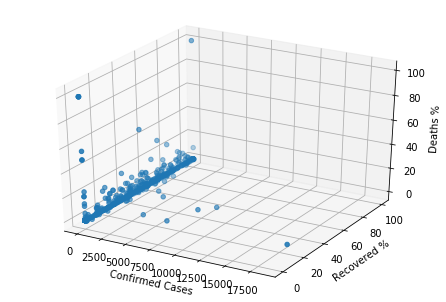

In [12]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df['Confirmed'],df['Recovered %'],df['Death %'])
ax.set_xlabel('Confirmed Cases')
ax.set_ylabel('Recovered %')
ax.set_zlabel('Deaths %')

In [13]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Confirmed','Recovered %','Death %']])
    sse.append(km.inertia_)

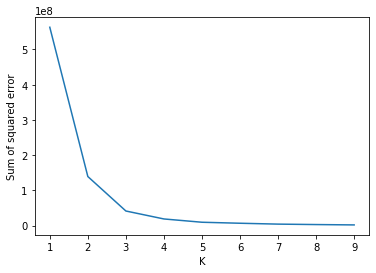

In [14]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [15]:
# Using k = 3 as per elbow method

In [16]:
km1 = KMeans(n_clusters=3,random_state=1)
y_predicted1 = km1.fit_predict(df[['Confirmed','Recovered %','Death %']])

In [17]:
df["Zone"] = y_predicted1

In [18]:
df

,State,District,Confirmed,Recovered %,Death %,Zone
0,Andaman and Nicobar Islands,Nicobars,0,0,0,0
1,Andaman and Nicobar Islands,North and Middle Andaman,1,100,0,0
2,Andaman and Nicobar Islands,South Andaman,32,100,0,0
3,Andhra Pradesh,Anantapur,122,76,3,0
4,Andhra Pradesh,Chittoor,173,44,0,0
...,...,...,...,...,...,...
780,Telangana,Unknown,40,100,10,0
781,Tripura,Unknown,0,0,0,0
782,Uttar Pradesh,Unknown,2,100,100,0
783,Uttarakhand,Unknown,0,0,0,0


Text(0.5, 0, 'Deaths %')

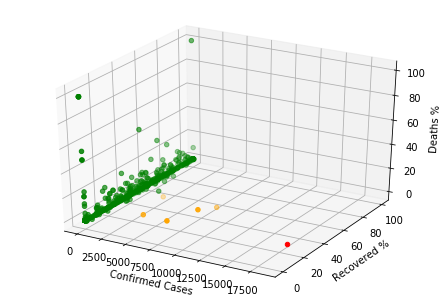

In [19]:
df_1 = df[df.Zone==0]
df_2 = df[df.Zone==1]
df_3 = df[df.Zone==2]
# df_4 = df[df.Zone==3]

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_1['Confirmed'],df_1['Recovered %'],df_1['Death %'], color = "green",label="Cluster1")
ax.scatter(df_2['Confirmed'],df_2['Recovered %'],df_2['Death %'], color = "red",label="Cluster2")
ax.scatter(df_3['Confirmed'],df_3['Recovered %'],df_3['Death %'], color = "orange",label="Cluster3")
# ax.scatter(df_4['Confirmed'],df_4['Recovered %'],df_4['Death %'], color = "black",label="Cluster4")
ax.set_xlabel('Confirmed Cases')
ax.set_ylabel('Recovered %')
ax.set_zlabel('Deaths %')



In [20]:
# Red Districts

In [21]:
for i in df_2.iterrows():
    print(i[1]["District"]," - ",i[1]["State"])

Mumbai  -  Maharashtra


In [22]:
# Orange Districts

In [23]:
for i in df_3.iterrows():
    print(i[1]["District"]," - ",i[1]["State"])

Ahmedabad  -  Gujarat
Pune  -  Maharashtra
Thane  -  Maharashtra
Chennai  -  Tamil Nadu
Unknown  -  Delhi


In [24]:
# Green Districts

In [25]:
for i in df_1.iterrows():
    print(i[1]["District"]," - ",i[1]["State"])

Nicobars  -  Andaman and Nicobar Islands
North and Middle Andaman  -  Andaman and Nicobar Islands
South Andaman  -  Andaman and Nicobar Islands
Anantapur  -  Andhra Pradesh
Chittoor  -  Andhra Pradesh
East Godavari  -  Andhra Pradesh
Guntur  -  Andhra Pradesh
Krishna  -  Andhra Pradesh
Kurnool  -  Andhra Pradesh
Other State  -  Andhra Pradesh
Prakasam  -  Andhra Pradesh
S.P.S. Nellore  -  Andhra Pradesh
Srikakulam  -  Andhra Pradesh
Visakhapatnam  -  Andhra Pradesh
Vizianagaram  -  Andhra Pradesh
West Godavari  -  Andhra Pradesh
Y.S.R. Kadapa  -  Andhra Pradesh
Anjaw  -  Arunachal Pradesh
Changlang  -  Arunachal Pradesh
East Kameng  -  Arunachal Pradesh
East Siang  -  Arunachal Pradesh
Kamle  -  Arunachal Pradesh
Kra Daadi  -  Arunachal Pradesh
Kurung Kumey  -  Arunachal Pradesh
Lepa Rada  -  Arunachal Pradesh
Lohit  -  Arunachal Pradesh
Longding  -  Arunachal Pradesh
Lower Dibang Valley  -  Arunachal Pradesh
Lower Siang  -  Arunachal Pradesh
Lower Subansiri  -  Arunachal Pradesh
Namsa

Hnahthial  -  Mizoram
Khawzawl  -  Mizoram
Kolasib  -  Mizoram
Lawngtlai  -  Mizoram
Lunglei  -  Mizoram
Mamit  -  Mizoram
Saiha  -  Mizoram
Saitual  -  Mizoram
Serchhip  -  Mizoram
Dimapur  -  Nagaland
Kiphire  -  Nagaland
Kohima  -  Nagaland
Longleng  -  Nagaland
Mokokchung  -  Nagaland
Mon  -  Nagaland
Peren  -  Nagaland
Phek  -  Nagaland
Tuensang  -  Nagaland
Wokha  -  Nagaland
Zunheboto  -  Nagaland
Angul  -  Odisha
Balangir  -  Odisha
Balasore  -  Odisha
Bargarh  -  Odisha
Bhadrak  -  Odisha
Boudh  -  Odisha
Cuttack  -  Odisha
Deogarh  -  Odisha
Dhenkanal  -  Odisha
Gajapati  -  Odisha
Ganjam  -  Odisha
Jagatsinghpur  -  Odisha
Jajpur  -  Odisha
Jharsuguda  -  Odisha
Kalahandi  -  Odisha
Kandhamal  -  Odisha
Kendrapara  -  Odisha
Kendujhar  -  Odisha
Khordha  -  Odisha
Koraput  -  Odisha
Malkangiri  -  Odisha
Mayurbhanj  -  Odisha
Nabarangapur  -  Odisha
Nayagarh  -  Odisha
Nuapada  -  Odisha
Puri  -  Odisha
Rayagada  -  Odisha
Sambalpur  -  Odisha
Subarnapur  -  Odisha
Sundargar